In [1]:
import sqlite3 as sql

import numpy as np
import pandas as pd
from pandas import cut, read_sql
import pickle as pkl
from random import choices
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.optimize as optimize

indir_burn_sample_db = "/groups/icecube/petersen/GraphNetDatabaseRepository/dev_lvl3_genie_burnsample/dev_lvl3_genie_burnsample_v5.db"
indir_Leon_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/Leon2022_DataAndMC_CSVandDB_StoppedMuons/last_one_lvl3MC.db"

outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_stop_track_muon/plotting/"



In [2]:
with sql.connect(indir_burn_sample_db) as con:
    query = """
    SELECT
        event_no, energy, zenith, sim_type, pid
    FROM 
        truth
    """
    burn_sample = read_sql(query,con)

burn_sample_MC = burn_sample[burn_sample['sim_type'] != 'data']

with sql.connect(indir_Leon_MC) as con:
    query = """
    SELECT
        event_no, energy, zenith, sim_type, pid
    FROM 
        truth
    """
    Leon = read_sql(query,con)


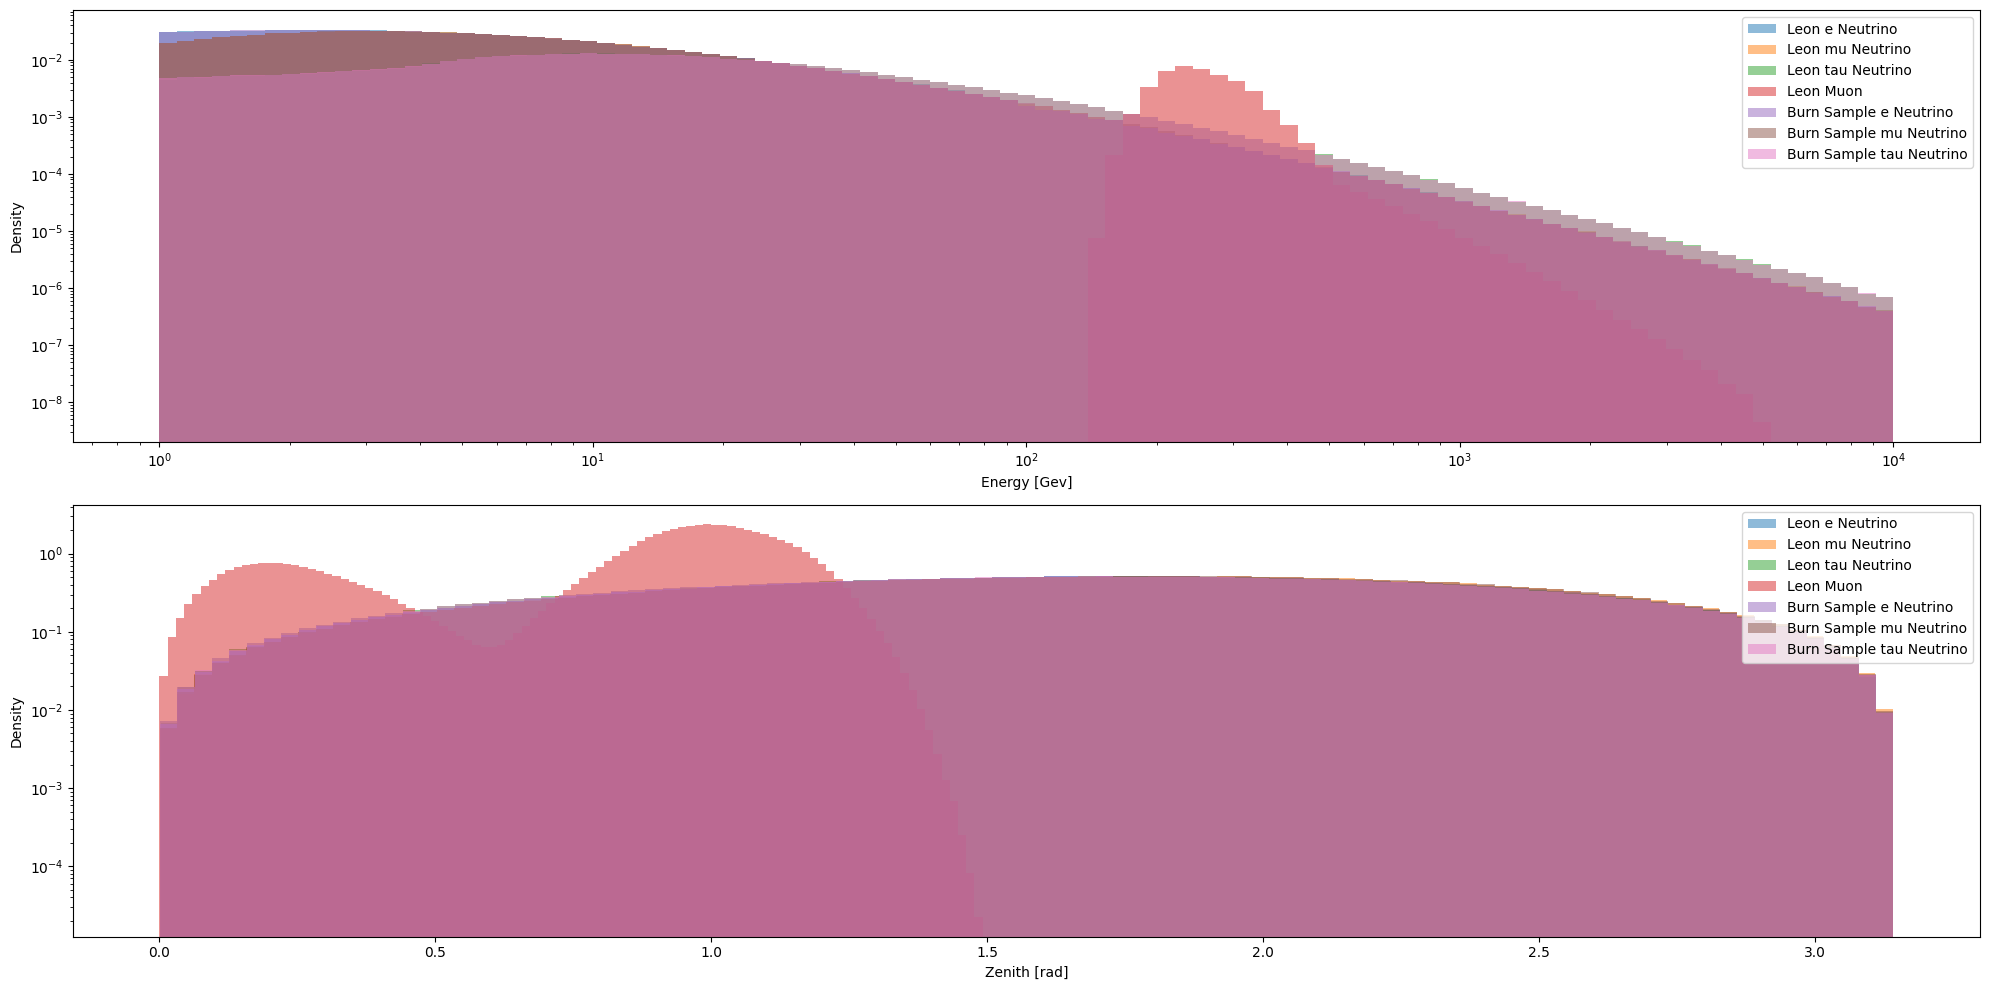

In [10]:
bin_nr = 100
energy_bins = np.logspace(0,4,100)

fig, axs = plt.subplots(2,1,sharex=False,figsize=(20, 10))

axs[0].hist(Leon['energy'][abs(Leon['pid'])==12].values,bins=energy_bins,density=True,alpha=0.5,label='Leon e Neutrino')
axs[0].hist(Leon['energy'][abs(Leon['pid'])==14].values,bins=energy_bins,density=True,alpha=0.5,label='Leon mu Neutrino')
axs[0].hist(Leon['energy'][abs(Leon['pid'])==16].values,bins=energy_bins,density=True,alpha=0.5,label='Leon tau Neutrino')
axs[0].hist(Leon['energy'][abs(Leon['pid'])==13].values,bins=energy_bins,density=True,alpha=0.5,label='Leon Muon')

axs[0].hist(burn_sample_MC['energy'][abs(burn_sample_MC['pid'])==12].values,bins=energy_bins,density=True,alpha=0.5,label='Burn Sample e Neutrino')
axs[0].hist(burn_sample_MC['energy'][abs(burn_sample_MC['pid'])==14].values,bins=energy_bins,density=True,alpha=0.5,label='Burn Sample mu Neutrino')
axs[0].hist(burn_sample_MC['energy'][abs(burn_sample_MC['pid'])==16].values,bins=energy_bins,density=True,alpha=0.5,label='Burn Sample tau Neutrino')


axs[0].set_ylabel('Density')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('Energy [Gev]')
axs[0].legend()


axs[1].hist(Leon['zenith'][abs(Leon['pid'])==12].values,bins=bin_nr,density=True,alpha=0.5,label='Leon e Neutrino')
axs[1].hist(Leon['zenith'][abs(Leon['pid'])==14].values,bins=bin_nr,density=True,alpha=0.5,label='Leon mu Neutrino')
axs[1].hist(Leon['zenith'][abs(Leon['pid'])==16].values,bins=bin_nr,density=True,alpha=0.5,label='Leon tau Neutrino')
axs[1].hist(Leon['zenith'][abs(Leon['pid'])==13].values,bins=bin_nr,density=True,alpha=0.5,label='Leon Muon')

axs[1].hist(burn_sample_MC['zenith'][abs(burn_sample_MC['pid'])==12].values,bins=bin_nr,density=True,alpha=0.5,label='Burn Sample e Neutrino')
axs[1].hist(burn_sample_MC['zenith'][abs(burn_sample_MC['pid'])==14].values,bins=bin_nr,density=True,alpha=0.5,label='Burn Sample mu Neutrino')
axs[1].hist(burn_sample_MC['zenith'][abs(burn_sample_MC['pid'])==16].values,bins=bin_nr,density=True,alpha=0.5,label='Burn Sample tau Neutrino')


axs[1].set_ylabel('Density')
axs[1].set_yscale('log')
axs[1].set_xlabel('Zenith [rad]')
axs[1].legend()

fig.tight_layout()

fig.savefig(outdir + 'Leon_and_burn_sample_energy_and_zenith_histograms.png')


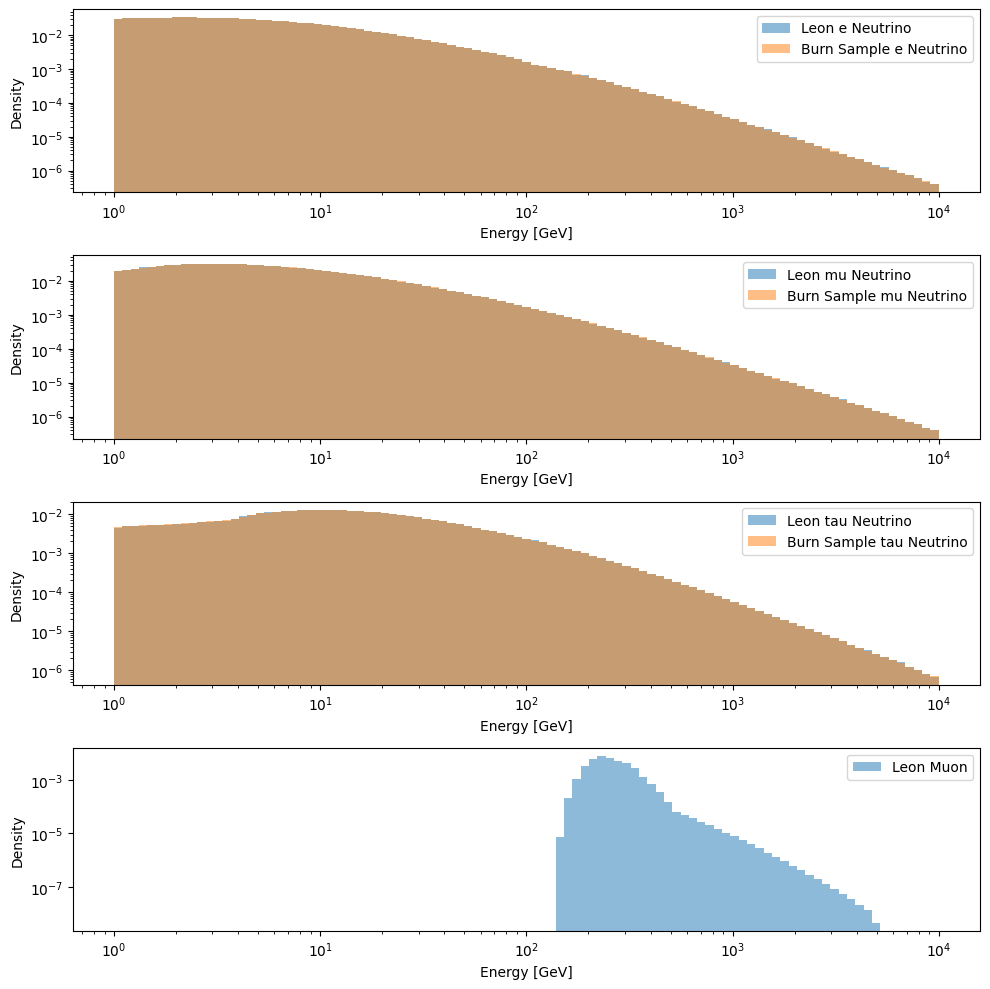

In [19]:
bin_nr = 100
energy_bins = np.logspace(0,4,100)

fig, axs = plt.subplots(4,1,sharex=False,figsize=(10, 10))

axs[0].hist(Leon['energy'][abs(Leon['pid'])==12].values,bins=energy_bins,density=True,alpha=0.5,label='Leon e Neutrino')
axs[1].hist(Leon['energy'][abs(Leon['pid'])==14].values,bins=energy_bins,density=True,alpha=0.5,label='Leon mu Neutrino')
axs[2].hist(Leon['energy'][abs(Leon['pid'])==16].values,bins=energy_bins,density=True,alpha=0.5,label='Leon tau Neutrino')
axs[3].hist(Leon['energy'][abs(Leon['pid'])==13].values,bins=energy_bins,density=True,alpha=0.5,label='Leon Muon')

axs[0].hist(burn_sample_MC['energy'][abs(burn_sample_MC['pid'])==12].values,bins=energy_bins,density=True,alpha=0.5,label='Burn Sample e Neutrino')
axs[1].hist(burn_sample_MC['energy'][abs(burn_sample_MC['pid'])==14].values,bins=energy_bins,density=True,alpha=0.5,label='Burn Sample mu Neutrino')
axs[2].hist(burn_sample_MC['energy'][abs(burn_sample_MC['pid'])==16].values,bins=energy_bins,density=True,alpha=0.5,label='Burn Sample tau Neutrino')




axs[0].set_xscale('log')

for i in range(4):
    axs[i].set_yscale('log')
    axs[i].set_xscale('log')
    axs[i].set_ylabel('Density')
    axs[i].set_xlabel('Energy [GeV]')
    axs[i].legend()

fig.tight_layout()

fig.savefig(outdir + 'Leon_and_burn_sample_energy_histograms_individual.png')

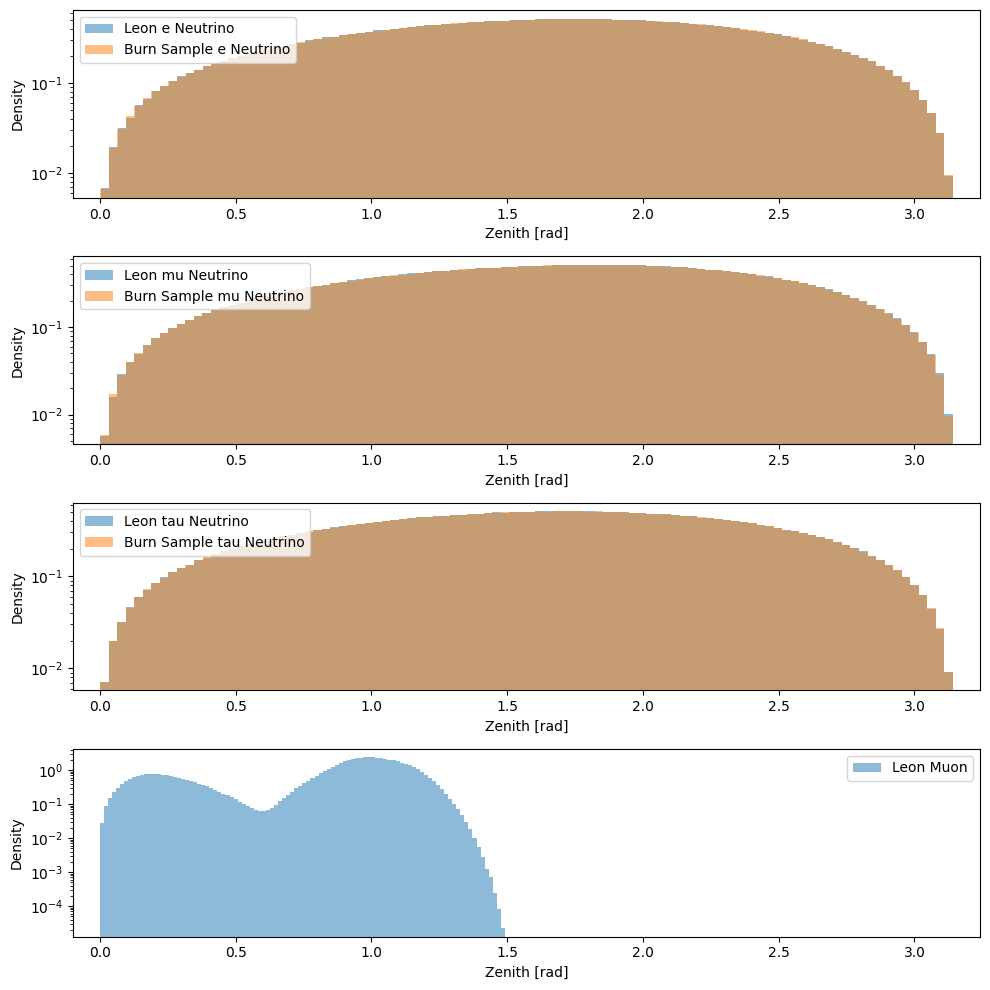

In [25]:
bin_nr = 100
energy_bins = np.logspace(0,4,100)

fig, axs = plt.subplots(4,1,sharex=False,figsize=(10, 10))

axs[0].hist(Leon['zenith'][abs(Leon['pid'])==12].values,bins=bin_nr,density=True,alpha=0.5,label='Leon e Neutrino')
axs[1].hist(Leon['zenith'][abs(Leon['pid'])==14].values,bins=bin_nr,density=True,alpha=0.5,label='Leon mu Neutrino')
axs[2].hist(Leon['zenith'][abs(Leon['pid'])==16].values,bins=bin_nr,density=True,alpha=0.5,label='Leon tau Neutrino')
axs[3].hist(Leon['zenith'][abs(Leon['pid'])==13].values,bins=bin_nr,density=True,alpha=0.5,label='Leon Muon')

axs[0].hist(burn_sample_MC['zenith'][abs(burn_sample_MC['pid'])==12].values,bins=bin_nr,density=True,alpha=0.5,label='Burn Sample e Neutrino')
axs[1].hist(burn_sample_MC['zenith'][abs(burn_sample_MC['pid'])==14].values,bins=bin_nr,density=True,alpha=0.5,label='Burn Sample mu Neutrino')
axs[2].hist(burn_sample_MC['zenith'][abs(burn_sample_MC['pid'])==16].values,bins=bin_nr,density=True,alpha=0.5,label='Burn Sample tau Neutrino')


for i in range(4):
    axs[i].set_yscale('log')
    axs[i].set_ylabel('Density')
    axs[i].set_xlabel('Zenith [rad]')
    axs[i].set_xlim((-0.1,np.pi+0.1))
    axs[i].legend()

fig.tight_layout()

fig.savefig(outdir + 'Leon_and_burn_sample_zenith_histograms_individual.png')

In [20]:
print(np.shape(burn_sample))
print(np.shape(Leon))

(98212967, 5)
(48264019, 5)


In [26]:
print('hej')

hej


In [37]:
print('Leon database')
print('PID')
print(Leon['pid'].unique())
print(Leon.pid.value_counts())
print('Sim_type')
print(Leon['sim_type'].unique())
print(Leon.sim_type.value_counts())


Leon database
PID
[ -1.  13.  16. -16.  14. -14.  12. -12.]
-1.0     21687112
 13.0    18027536
 16.0     2296194
 14.0     1941709
 12.0     1777478
-14.0      880693
-16.0      865487
-12.0      787810
Name: pid, dtype: int64
Sim_type
['noise' 'muongun' 'genie']
noise      21687112
muongun    18027536
genie       8549371
Name: sim_type, dtype: int64


In [38]:
print('Burn_sample database')
print('PID')
print(burn_sample['pid'].unique())
print(burn_sample.pid.value_counts())
print('Sim_type')
print(burn_sample['sim_type'].unique())
print(burn_sample.sim_type.value_counts())

Burn_sample database
PID
[ -1. -14.  14. -12.  12.  16. -16.]
-1.0     61739862
 14.0    13555279
 16.0     6257494
-14.0     6140114
 12.0     5655260
-12.0     2508616
-16.0     2356342
Name: pid, dtype: int64
Sim_type
['data' 'genie']
data     61739862
genie    36473105
Name: sim_type, dtype: int64
